In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import ot

from dtmrpy import DT_GMM

device='cuda'


In [2]:
df = pd.read_pickle("data_files/dtmri_dataframe_11_2.pkl")
df = df[df['labels']!='#NULL!']

df


,sid,Cingulum_Frontal_Parahippocampal_L,Cingulum_Frontal_Parahippocampal_R,Cingulum_Frontal_Parietal_L,Cingulum_Frontal_Parietal_R,Cingulum_Parahippocampal_L,Cingulum_Parahippocampal_R,Cingulum_Parahippocampal_Parietal_L,Cingulum_Parahippocampal_Parietal_R,Cingulum_Parolfactory_L,...,Fornix_R,Superior_Longitudinal_Fasciculus1_L,Superior_Longitudinal_Fasciculus1_R,Superior_Longitudinal_Fasciculus2_L,Superior_Longitudinal_Fasciculus2_R,Superior_Longitudinal_Fasciculus3_L,Superior_Longitudinal_Fasciculus3_R,Uncinate_Fasciculus_L,Uncinate_Fasciculus_R,labels
0,6610,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff5b9120e80>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcee39d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcea9850>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce70790>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce376d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd7d610>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd445b0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd0d4c0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dccd33a0>,...,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcb30af0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcaf6910>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca3e850>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca04790>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc9ca6d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc992610>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc958550>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc91f490>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc8e73d0>,0
1,6753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,6824,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff5b918d640>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcee3a30>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcea98b0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce707f0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce37730>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd7d670>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd44610>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd0d520>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dccd3400>,...,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcb30b50>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcaf6970>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca3e8b0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca047f0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc9ca730>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc992670>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc9585b0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc91f4f0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc8e7430>,1
3,7373,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff5b918d760>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcee3a90>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcea9910>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce70850>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce37790>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd7d6d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd44670>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd0d580>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dccd3460>,...,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcb30bb0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcaf69d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca3e910>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca04850>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc9ca790>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc9926d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc958610>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc91f550>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc8e7490>,0
5,7470,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff596456e20>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcee3b50>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcea99d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce70910>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dce37850>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd7d790>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd44730>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcd0d640>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dccd3520>,...,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcb30c70>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dcaf6a90>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca3e9d0>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dca04910>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc9ca850>,<dtmrpy.dtmrpy.DT_GMM object at 0x7ff4dc

In [3]:
from scipy.spatial.distance import cdist

def bures_distance_matrix(Sigma_x,Sigma_y):
    Lx, Ux = torch.linalg.eigh(Sigma_x)
    Sigma_x_sqrt = torch.matmul(torch.matmul(Ux,torch.diag_embed(torch.sqrt(Lx))),Ux)
    
    cross_term = torch.matmul(torch.matmul(Sigma_x_sqrt, Sigma_y.unsqueeze(1)),Sigma_x_sqrt.unsqueeze(0))
    Lc, Uc = torch.linalg.eigh(cross_term)
    sqrt_cross_term = torch.matmul(torch.matmul(Uc,torch.diag_embed(torch.sqrt(Lc))),Uc)

    return torch.einsum('ijkk -> ij', Sigma_x.unsqueeze(0) + Sigma_y.unsqueeze(1) - 2*sqrt_cross_term).T #the transpose here should be fixed



def bures_distance_matrix2(Sigma_x,Sigma_y):
    Lx, Qx = torch.linalg.eigh(Sigma_x)
    Sigma_x_sqrt = Qx @ torch.diag_embed(torch.sqrt(Lx*(Lx>0))) @ Qx.mH
    
    cross_term = torch.matmul(torch.matmul(Sigma_x_sqrt, Sigma_y.unsqueeze(1)),Sigma_x_sqrt.unsqueeze(0))
    
    N=cross_term.shape[0]
    M=int(600000/cross_term.shape[1])
    
    for i in np.arange(0,N,M):
        Lc,Qc = torch.linalg.eigh(cross_term[i:(i+M)])
        cross_term[i:i+M] = Qc @ torch.diag_embed(torch.sqrt((Lc*(Lc>0)))) @ Qc.mH
    
    # Lc, Qc = torch.linalg.eigh(cross_term)
    # sqrt_cross_term = Qc @ torch.diag_embed(torch.sqrt(Lc)) @ Qc.mH

    return torch.einsum('ijkk -> ij', Sigma_x.unsqueeze(0) + Sigma_y.unsqueeze(1) - 2*cross_term).T #the transpose here should be fixed
    # return torch.einsum('ijkk -> ij', Sigma_x.unsqueeze(0) + Sigma_y.unsqueeze(1) - 2*sqrt_cross_term).T #the transpose here should be fixed
    
    
def wasserstein_type_distance(mu0,mu1):
    (weights0,means0,sigma0)=(mu0.weights_,mu0.means_,torch.tensor(mu0.covariances_).to("cuda:1"))
    (weights1,means1,sigma1)=(mu1.weights_,mu1.means_,torch.tensor(mu1.covariances_).to("cuda:1"))

    M = cdist(means0,means1)**2 + bures_distance_matrix2(sigma0,sigma1).cpu().numpy()
    
    a = weights0.reshape(-1)/np.sum(weights0)
    b = weights1.reshape(-1)/np.sum(weights1)
    return np.sum(M*ot.emd(a,b,M)) #+ abs(np.sum(weights0)-np.sum(weights1))


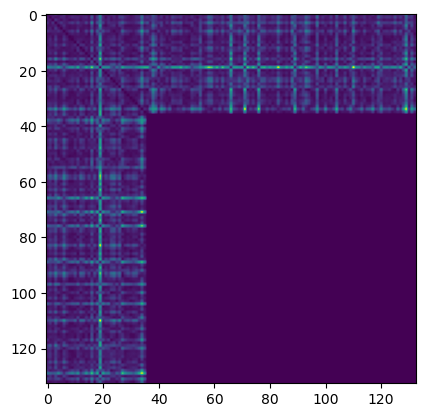

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [ ]:
from IPython.display import clear_output

for tract_name in df.columns[3:-1]:
    #This is a bad pattern
    y = df['labels'][df[tract_name].notna()]
    tract = df[tract_name].dropna()
    
    N = tract.count()
    W = np.zeros((N,N))
    for i, mu0 in enumerate(tract):
        for j, mu1 in enumerate(tract[i+1:]):
            print(j, end=' ')
            # M,Pi=wasserstein_type_distance(mu0,mu1)
            W[i,(i+1)+j] = wasserstein_type_distance(mu0,mu1)#np.sum(M*Pi)
        
        clear_output(wait=True)
        plt.imshow(W+W.T)
        plt.show()
        
    np.save("data_files/Distance Matrices/"+tract_name+".npy",W+W.T)
    np.save("data_files/Distance Matrices/"+tract_name+"_labels.npy",y)
        

In [73]:
W = np.load("data_files/Distance Matrices/Cingulum_Frontal_Parahippocampal_R.npy")
y = np.load("data_files/Distance Matrices/Cingulum_Frontal_Parahippocampal_R_labels.npy", allow_pickle=True).astype(int)

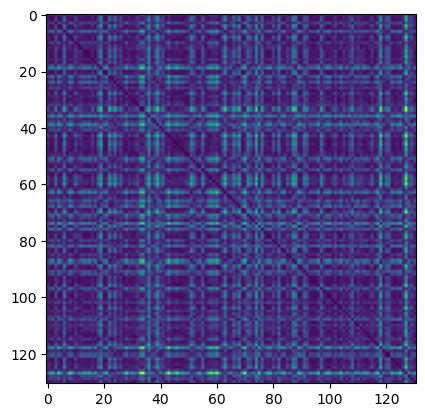

In [74]:
plt.imshow(W)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=1,metric='precomputed')

knn.fit(W,y)



KNeighborsClassifier(metric='precomputed', n_neighbors=1)

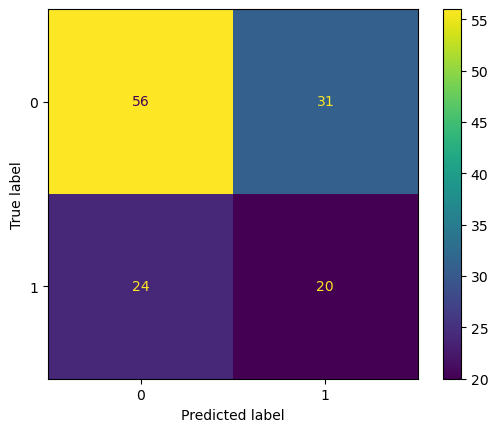

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y,y_hat)).plot()
plt.show()

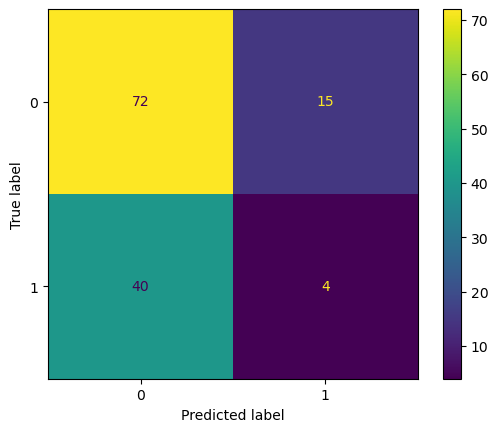

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, LeaveOneOut

rf = RandomForestClassifier(class_weight='balanced')

y_hat=cross_val_predict(rf,W,y,cv=LeaveOneOut())

ConfusionMatrixDisplay(confusion_matrix(y,y_hat)).plot()
plt.show()

In [ ]:
y_hat=cross_val_predict(KNeighborsClassifier(n_neighbors=1,metric='precomputed'),W,y,cv=LeaveOneOut())